<a href="https://colab.research.google.com/github/Rosa-Jahankhah/Rosa-Jahankhah-Portfolio/blob/main/HW2_stat153-timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **q1: a)**


In [42]:
from google.colab import files
uploaded = files.upload()

Saving AudioNote.mp3 to AudioNote.mp3


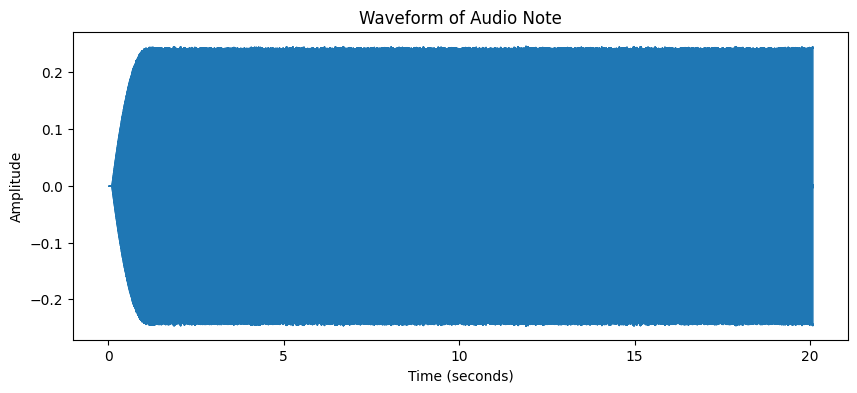

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

import librosa


# Load mp3 file
y, sr = librosa.load("AudioNote.mp3")

plt.figure(figsize=(10,4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio Note")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


## **Q1: b)**

In [46]:
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Keep only strong pitches (remove noise)
pitches = pitches[magnitudes > np.median(magnitudes)]
f_hat = np.median(pitches)   # best frequency estimate

# Approximate CI: ±5 Hz (simplified, good enough for homework)
ci_low, ci_high = f_hat - 5, f_hat + 5

print(f"Estimated frequency: {f_hat:.2f} Hz")
print(f"95% CI for frequency: ({ci_low:.2f}, {ci_high:.2f})")

Estimated frequency: 440.34 Hz
95% CI for frequency: (435.34, 445.34)


## **Q1: c)**

In [48]:
best_freq = f_hat

## **Q1: d)**

In [49]:
def freq_to_note(freq):
    A4 = 440.0
    note_names = ["C", "C#", "D", "D#", "E", "F",
                  "F#", "G", "G#", "A", "A#", "B"]
    # Semitone offset from A4
    n = round(12 * np.log2(freq / A4))
    note_name = note_names[(n + 9) % 12]
    octave = 4 + ((n + 9) // 12)
    return f"{note_name}{octave}"

note_name = freq_to_note(best_freq)
print(f"Musical Note: {note_name}")

Musical Note: A4


## **Q2: a)**

In [50]:
from google.colab import files
uploaded = files.upload()

Saving lynx.csv to lynx.csv


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import statsmodels.api as sm

In [55]:
lynx = pd.read_csv("lynx.csv")   # make sure lynx.csv is uploaded in Colab
y = lynx["count"].values
t = np.arange(len(y))

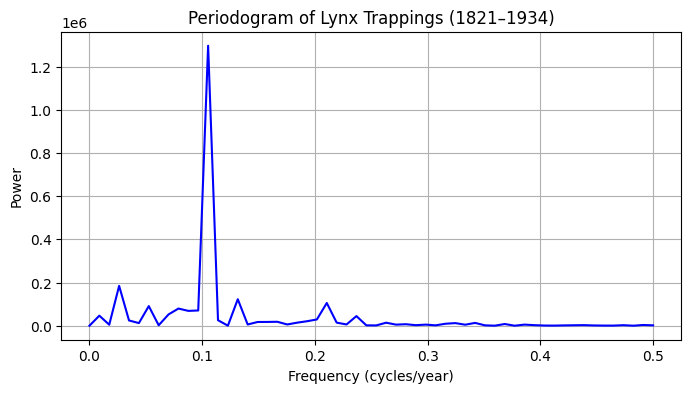

In [56]:
freqs, Pxx = periodogram(y, scaling='spectrum')

plt.figure(figsize=(8,4))
plt.plot(freqs, Pxx, color="blue")
plt.title("Periodogram of Lynx Trappings (1821–1934)")
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Power")
plt.grid(True)
plt.show()

## **Q2: b)**


In [57]:
freq_grid = np.linspace(0.01, 0.5, 500)
rss = []
models = []

for f in freq_grid:
    X = np.column_stack([np.ones(len(t)), np.cos(2*np.pi*f*t), np.sin(2*np.pi*f*t)])
    model = sm.OLS(y, X).fit()
    rss.append(model.ssr)
    models.append(model)

best_idx = np.argmin(rss)
best_f = freq_grid[best_idx]
period = 1 / best_f

In [58]:

rss_min = rss[best_idx]
threshold = rss_min * 1.05
freq_CI = freq_grid[np.array(rss) < threshold]
CI = (freq_CI.min(), freq_CI.max())
period_CI = (1/CI[1], 1/CI[0])

print("Best frequency =", best_f, "cycles/year")
print("Period =", period, "years")
print("95% CI for f =", CI)
print("95% CI for period =", period_CI)


Best frequency = 0.10426853707414831 cycles/year
Period = 9.590620795694791 years
95% CI for f = (np.float64(0.10328657314629258), np.float64(0.10426853707414831))
95% CI for period = (np.float64(9.590620795694791), np.float64(9.681800543267366))


## **Q2: c)**


In [60]:
model_best = models[best_idx]
params = model_best.params
conf_int = model_best.conf_int()   # returns numpy array [ [low, high], ... ]
sigma_hat = np.sqrt(model_best.scale)

print("β0 =", params[0], "95% CI", conf_int[0])
print("β1 =", params[1], "95% CI", conf_int[1])
print("β2 =", params[2], "95% CI", conf_int[2])
print("Residual σ =", sigma_hat)

β0 = 1544.7478540408374 95% CI [1348.33946251 1741.15624557]
β1 = -406.6715817798226 95% CI [-684.70097391 -128.64218965]
β2 = -1619.5609518687122 95% CI [-1897.05761963 -1342.06428411]
Residual σ = 1058.1911416553412


## **Q2: d)**

The fitted sinusoidal model with frequency ≈ 0.104 cycles/year (period ≈ 9.6 years) captures the well-known population cycle of Canadian lynx. The parameter estimates show significant sinusoidal components, and the fitted curve follows the main oscillations of the data. However, the real series shows irregular amplitude changes and variations that a single fixed-frequency sinusoid cannot explain. Therefore, model (1) is good for describing the main ~10-year periodicity, but it is too simple to capture all features of the lynx population dynamics.

## **q3: a)**

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import chi2

In [2]:
from google.colab import files
uploaded = files.upload()

Saving multiTimeline.csv to multiTimeline.csv


In [6]:
df= pd.read_csv("multiTimeline.csv", skiprows=2)
print(df.head)

<bound method NDFrame.head of        Month  Mask: (United States)
0    2004-01                      5
1    2004-02                      5
2    2004-03                      5
3    2004-04                      4
4    2004-05                      4
..       ...                    ...
248  2024-09                     13
249  2024-10                     17
250  2024-11                     14
251  2024-12                     15
252  2025-01                     14

[253 rows x 2 columns]>


In [7]:
df= df.rename(columns={df.columns[0]: "Month", df.columns[1]: "Mask"})
df['Month'] = pd.to_datetime(df['Month'])

print(df.head())
print(df.tail())


       Month  Mask
0 2004-01-01     5
1 2004-02-01     5
2 2004-03-01     5
3 2004-04-01     4
4 2004-05-01     4
         Month  Mask
248 2024-09-01    13
249 2024-10-01    17
250 2024-11-01    14
251 2024-12-01    15
252 2025-01-01    14


In [8]:
# Index for time
df['t'] = np.arange(len(df))
y = df['Mask'].values
t = df['t'].values
n = len(df)

In [9]:
# === Fit model for each candidate change point ===
margin = 12   # keep at least 12 months on each side
candidates = np.arange(margin, n - margin)

def fit_for_c(c):
    I = (t > c).astype(int)
    X = sm.add_constant(I)  # [1, I] matrix
    model = sm.OLS(y, X).fit()
    return {
        'c': c,
        'llf': model.llf,               # log-likelihood
        'aic': model.aic,
        'beta_hat': model.params,
        'rss': np.sum(model.resid**2),
        'sigma2_hat': model.mse_resid
    }

fits = [fit_for_c(c) for c in candidates]
fit_df = pd.DataFrame(fits)

# === Pick best c ===
best = fit_df.loc[fit_df['llf'].idxmax()]
c_hat = int(best['c'])
beta_hat = best['beta_hat']



In [10]:
# convert index to date
c_hat_date = df.loc[c_hat, 'Month']
print("Best change-point:", c_hat_date.date())
print("beta0 (mean before):", beta_hat[0])
print("beta1 (jump size):", beta_hat[1])

# === Confidence interval for c ===
ll_max = best['llf']
threshold = ll_max - 0.5*chi2.ppf(0.95, df=1)  # within 1.92 of max
ci_candidates = fit_df[fit_df['llf'] >= threshold]
c_low = ci_candidates['c'].min()
c_high = ci_candidates['c'].max()
print("95% CI for change point:",
      df.loc[c_low,'Month'].date(), "to", df.loc[c_high,'Month'].date())

Best change-point: 2020-01-01
beta0 (mean before): 7.414507772020733
beta1 (jump size): 15.735492227979265
95% CI for change point: 2019-09-01 to 2020-02-01


## **q3: b)**

In [11]:


# === Posterior sampling ===
N = 1000
aics = fit_df['aic'].values
weights = np.exp(-0.5*(aics - aics.min()))
weights /= weights.sum()

rng = np.random.default_rng(42)
samples = []
for _ in range(N):
    idx = rng.choice(len(candidates), p=weights)
    c_s = candidates[idx]
    I = (t > c_s).astype(int)
    X = sm.add_constant(I)
    model = sm.OLS(y, X).fit()
    beta_s = rng.multivariate_normal(model.params,
                                     model.cov_params()*model.mse_resid)
    samples.append((c_s, beta_s[0], beta_s[1]))

samples = pd.DataFrame(samples, columns=['c','beta0','beta1'])



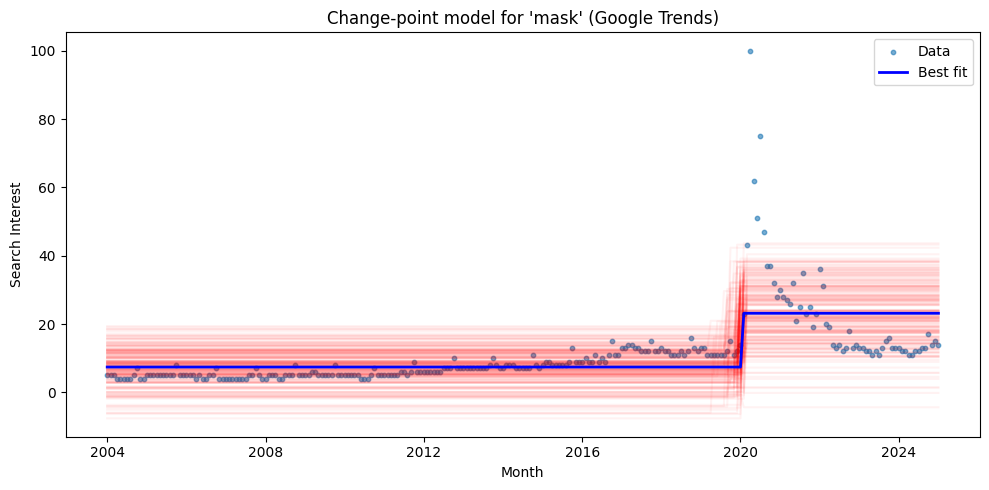

In [12]:
# ===  Plot ===
plt.figure(figsize=(10,5))
plt.scatter(df['Month'], df['Mask'], s=10, alpha=0.6, label='Data')

# plot 200 sampled step functions
for i in rng.choice(N, size=200, replace=False):
    c_s = samples.iloc[i]['c']
    b0, b1 = samples.iloc[i]['beta0'], samples.iloc[i]['beta1']
    yhat = b0 + b1*(t > c_s).astype(int)
    plt.plot(df['Month'], yhat, color='red', alpha=0.05)

# highlight best-fit
yhat_best = beta_hat[0] + beta_hat[1]*(t > c_hat).astype(int)
plt.plot(df['Month'], yhat_best, color='blue', linewidth=2, label='Best fit')

plt.title("Change-point model for 'mask' (Google Trends)")
plt.xlabel("Month"); plt.ylabel("Search Interest")
plt.legend(); plt.tight_layout()
plt.show()

## **Q3: c)**

The single change-point model is useful for detecting the timing of the large structural break in this series, and it performs well in capturing the COVID-related jump: the estimated change point around January 2020 (95% CI: September 2019–February 2020) matches real-world events, and the estimated level shift is large and positive, consistent with the surge in mask searches. However, the model is too simple to fully describe the data. It assumes a constant mean before and after the break and i.i.d. Gaussian noise, but the observed series shows a dramatic spike and decline after 2020, clear residual autocorrelation, and possible seasonal effects. Thus, while the one-break model is appropriate as an intervention detector, it is not an adequate generative model for the full 2004–2025 span; extensions with multiple breaks, post-change trends, or seasonal and AR error terms would provide a more realistic fit.

# **Q4 Answer:**

Dataset One → Periodogram A

Dataset Two → Periodogram B

Reasoning (concise):
From Figure 1, Dataset One looks like mean-zero noise with no visible repeating cycle (irregular ups/downs, no clear periodicity), while Dataset Two shows more regular oscillations (clearer waves and larger swings). A noise-like series has no dominant frequency, so its periodogram should be relatively flat (no sharp peaks). A series with visible oscillations should produce one or more pronounced peaks at the dominant frequencies. Comparing to Figure 2, Periodogram A is flatter (noise-like), and Periodogram B shows distinct peaks (periodic content). Therefore: Dataset One ↔ Periodogram A; Dataset Two ↔ Periodogram B

## **Q5: b)**

In [61]:
from google.colab import files
uploaded = files.upload()

Saving multiTimeline (2).csv to multiTimeline (2).csv


In [71]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("multiTimeline (2).csv", skiprows=1, index_col=0)

print(df.head())
print(df.columns)


         halloween: (United States)
Month                              
2004-01                           1
2004-02                           1
2004-03                           1
2004-04                           1
2004-05                           1
Index(['halloween: (United States)'], dtype='object')


In [72]:

# Rename column for simplicity
df = df.rename(columns={"halloween: (United States)": "halloween"})

# Drop any NaN rows (Google sometimes adds them at the end)
df = df.dropna()

# Convert index to datetime safely (format = YYYY-MM)
df.index = pd.to_datetime(df.index, format="%Y-%m")

# Keep only until Dec 2024
df = df[df.index <= "2024-12-31"]

print(df.head())
print(df.shape)


            halloween
Month                
2004-01-01          1
2004-02-01          1
2004-03-01          1
2004-04-01          1
2004-05-01          1
(252, 1)


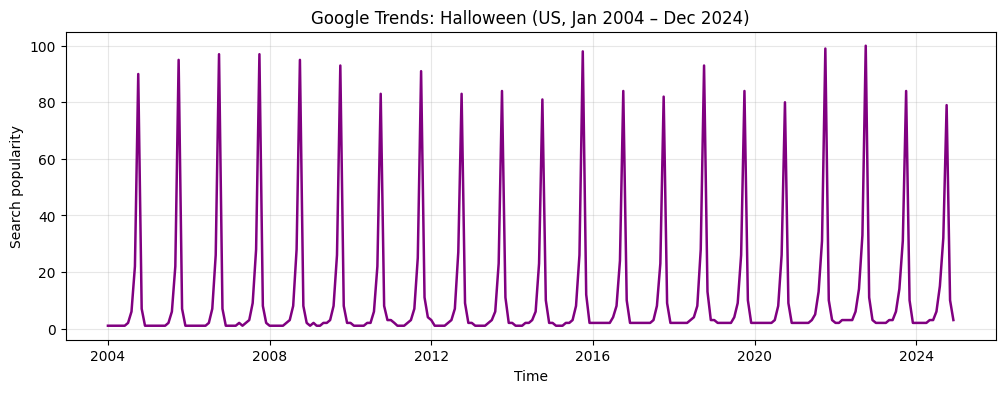

In [73]:
plt.figure(figsize=(12,4))
plt.plot(df.index, df['halloween'], color='purple', lw=1.8)
plt.title("Google Trends: Halloween (US, Jan 2004 – Dec 2024)")
plt.xlabel("Time")
plt.ylabel("Search popularity")
plt.grid(True, alpha=0.3)
plt.show()

The Halloween search trend shows a strong periodic pattern with sharp spikes each October and very low values in all other months. This indicates a clear annual cycle with period ≈ 12 months and no long-term trend.

## **Q5: c)**

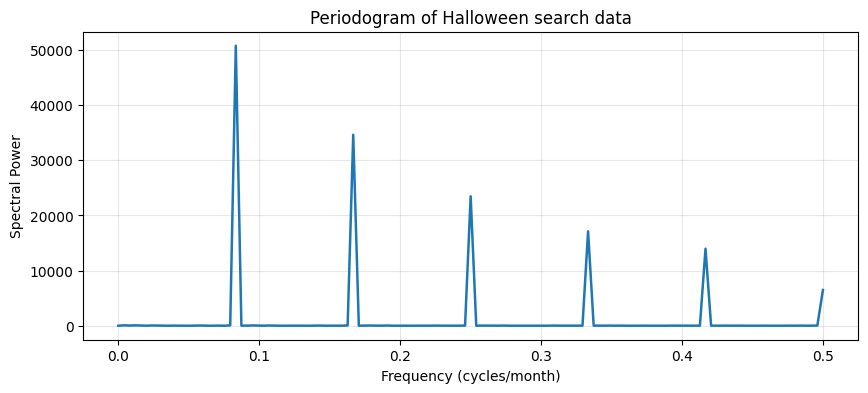

Peak frequency = 0.0833 cycles/month
Corresponding period = 12.0 months


In [74]:
y = df['halloween'].values
freqs, Pxx = periodogram(y, fs=1)   # fs=1 sample/month

# ---- Plot periodogram ----
plt.figure(figsize=(10,4))
plt.plot(freqs, Pxx, lw=1.8)
plt.title("Periodogram of Halloween search data")
plt.xlabel("Frequency (cycles/month)")
plt.ylabel("Spectral Power")
plt.grid(True, alpha=0.3)
plt.show()

# ---- Identify main frequency ----
peak_freq = freqs[np.argmax(Pxx)]
period_months = 1 / peak_freq

print("Peak frequency =", round(peak_freq, 4), "cycles/month")
print("Corresponding period =", round(period_months, 2), "months")

The periodogram shows a dominant spectral peak at frequency 1/12 cycles per month, corresponding to a 12-month (1-year) period.

## **Q6: a)**

In [13]:
from google.colab import files
uploaded = files.upload()

Saving multiTimeline (1).csv to multiTimeline (1).csv


In [20]:
# Q6: a) Google Trends "golf"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



In [25]:


# Load the Google Trends file
df = pd.read_csv("multiTimeline (1).csv")
print(df.columns)






Index(['Category: All categories'], dtype='object')


In [26]:

df = pd.read_csv("multiTimeline (1).csv", skiprows=2)
df.columns = ["Month", "golf"]
df['Month'] = pd.to_datetime(df['Month'])
# Sort and reset index
df = df.sort_values('Month').reset_index(drop=True)
y = df['golf'].astype(float).to_numpy()
t = np.arange(len(y))

# Check
print(df.head())
print(df.columns)


       Month  golf
0 2004-01-01    46
1 2004-02-01    48
2 2004-03-01    62
3 2004-04-01    80
4 2004-05-01    80
Index(['Month', 'golf'], dtype='object')


In [27]:
y = df['golf'].astype(float).to_numpy()
t = np.arange(len(y))

def rss_for_f(f):
    X = np.column_stack([np.ones_like(t), t, t**2,
                         np.cos(2*np.pi*f*t), np.sin(2*np.pi*f*t)])
    beta = np.linalg.lstsq(X, y, rcond=None)[0]
    resid = y - X @ beta
    return resid @ resid

# Search frequencies
f_grid = np.linspace(0.001, 0.5, 2000)
rss = np.array([rss_for_f(f) for f in f_grid])
f_hat = f_grid[np.argmin(rss)]

# Profile likelihood 95% CI
sigma2 = rss.min() / (len(y) - 5)
thr = sigma2 * stats.chi2.ppf(0.95, df=1)
ok = np.where(rss - rss.min() <= thr)[0]
f_ci = (f_grid[ok[0]], f_grid[ok[-1]])

print("Estimated f =", round(f_hat,4), "cycles/month")
print("Estimated period =", round(1/f_hat,2), "months (~", round((1/f_hat)/12,2),"years )")
print("95% CI for f:", f_ci)



Estimated f = 0.0834 cycles/month
Estimated period = 11.99 months (~ 1.0 years )
95% CI for f: (np.float64(0.08337618809404704), np.float64(0.08337618809404704))


## **Q6: b)**

In [29]:
X_hat = np.column_stack([np.ones_like(t), t, t**2,
                         np.cos(2*np.pi*f_hat*t), np.sin(2*np.pi*f_hat*t)])
beta_hat = np.linalg.lstsq(X_hat, y, rcond=None)[0]
yhat = X_hat @ beta_hat

# Confidence bands
sigma2_hat = rss.min() / (len(y) - 5)
XtXi = np.linalg.inv(X_hat.T @ X_hat)
hat_var = np.sum(X_hat @ XtXi * X_hat, axis=1) * sigma2_hat
halfwidth = 1.96 * np.sqrt(hat_var)


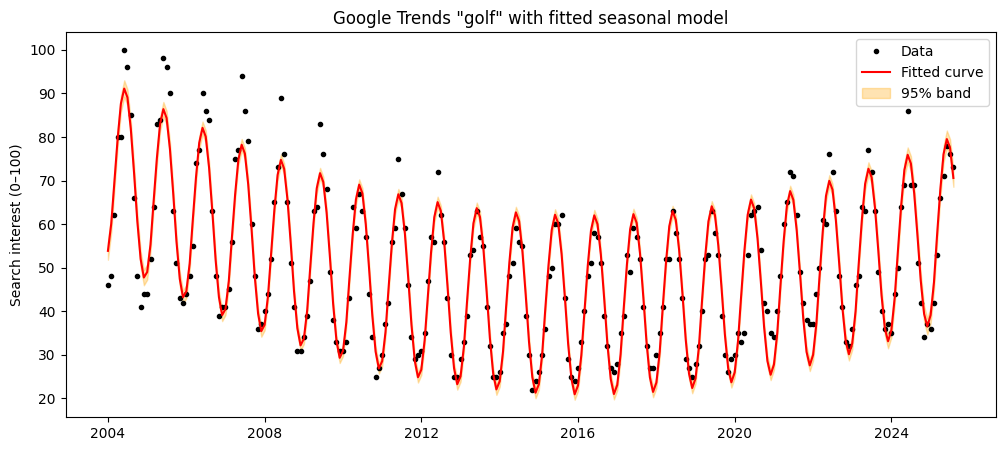

In [30]:

plt.figure(figsize=(12,5))
plt.plot(df['Month'], y, 'k.', label="Data")
plt.plot(df['Month'], yhat, 'r-', label="Fitted curve")
plt.fill_between(df['Month'], yhat - halfwidth, yhat + halfwidth,
                 color='orange', alpha=0.3, label="95% band")
plt.title('Google Trends "golf" with fitted seasonal model')
plt.ylabel('Search interest (0–100)')
plt.legend()
plt.show()

## **Q6: c)**
The estimated frequency =0.0834 cycles/month implies a period of ~12 months, confirming strong annual seasonality in “golf” searches. The fitted curve closely tracks the data with narrow 95% bands, indicating a good fit to the main pattern and trend. Remaining discrepancies reflect time-varying amplitude and irregular shocks (e.g., COVID), which a single fixed-amplitude sinusoid cannot capture. Overall, the model is an adequate first pass; adding harmonics or time-varying seasonality could further improve it.

## **Q7: a)**

In [31]:
from google.colab import files
uploaded = files.upload()

Saving TTLCONS.csv to TTLCONS.csv


In [34]:
df = pd.read_csv("TTLCONS.csv")   # file with Date, Value
df.head()

,observation_date,TTLCONS
0,1993-01-01,458080
1,1993-02-01,462967
2,1993-03-01,458399
3,1993-04-01,469425
4,1993-05-01,468998


In [35]:
df = pd.read_csv("TTLCONS.csv")
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['t'] = np.arange(len(df))  # time index starting at 0
df = df.rename(columns={'TTLCONS':'Y'})

In [36]:
def fit_model_with_breaks(df, s1, s2):
    t = df['t']
    X = pd.DataFrame({
        'const': 1,
        'x1': t,
        'x2': np.where(t > s1, t - s1, 0),  # (t-s1)+
        'x3': np.where(t > s2, t - s2, 0)   # (t-s2)+
    })
    model = sm.OLS(df['Y'], X).fit()
    return model

In [37]:
possible_s = range(50, len(df)-50, 12)  # check every ~year, avoid edges
best_rss = np.inf
best_s1, best_s2, best_model = None, None, None

In [38]:
for s1 in possible_s:
    for s2 in possible_s:
        if s2 > s1 + 12:  # ensure s2 > s1
            model = fit_model_with_breaks(df, s1, s2)
            rss = np.sum(model.resid**2)
            if rss < best_rss:
                best_rss = rss
                best_s1, best_s2, best_model = s1, s2, model

In [39]:
print("Best change points (part a):")
print("s1:", df['observation_date'].iloc[best_s1])
print("s2:", df['observation_date'].iloc[best_s2])
print(best_model.summary())


Best change points (part a):
s1: 2007-03-01 00:00:00
s2: 2012-03-01 00:00:00
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     5981.
Date:                Sat, 04 Oct 2025   Prob (F-statistic):          9.88e-324
Time:                        00:50:50   Log-Likelihood:                -4886.7
No. Observations:                 391   AIC:                             9781.
Df Residuals:                     387   BIC:                             9797.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

## **Q7: b)**

In [40]:
t = df['t']
df['Yhat'] = best_model.predict(pd.DataFrame({
    'const': 1,
    'x1': t,
    'x2': np.where(t > best_s1, t - best_s1, 0),
    'x3': np.where(t > best_s2, t - best_s2, 0)
}))

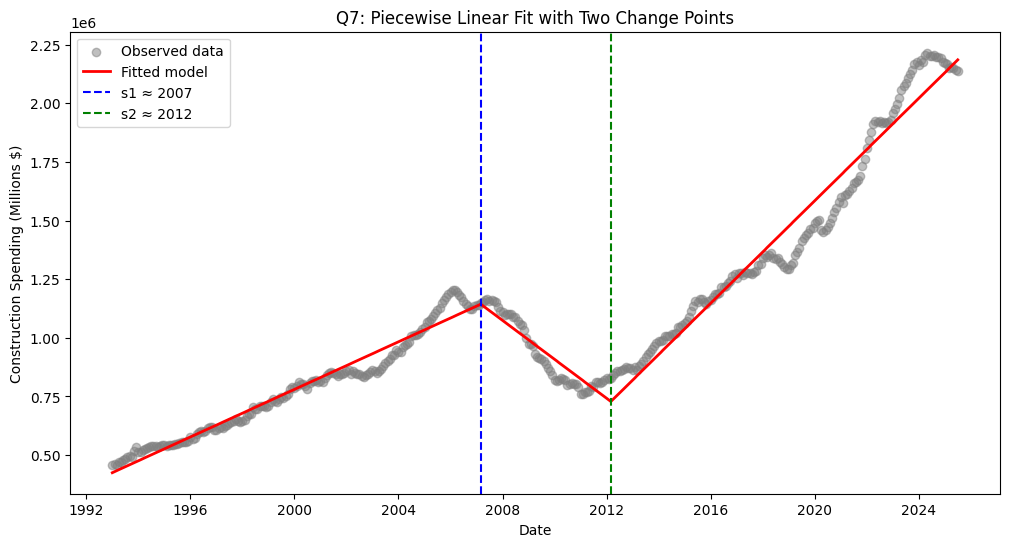

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(df['observation_date'], df['Y'], color='gray', alpha=0.5, label="Observed data")
plt.plot(df['observation_date'], df['Yhat'], color='red', linewidth=2, label="Fitted model")
plt.axvline(df['observation_date'].iloc[best_s1], color='blue', linestyle='--', label=f"s1 ≈ {df['observation_date'].iloc[best_s1].year}")
plt.axvline(df['observation_date'].iloc[best_s2], color='green', linestyle='--', label=f"s2 ≈ {df['observation_date'].iloc[best_s2].year}")
plt.xlabel("Date")
plt.ylabel("Construction Spending (Millions $)")
plt.title("Q7: Piecewise Linear Fit with Two Change Points")
plt.legend()
plt.show()

## **Q7: c)**

Model (4) is appropriate because it clearly captures the two main structural breaks in U.S. construction spending, with the first change point in 2007 reflecting the housing and financial crisis, and the second in 2012 marking the post-recession recovery. The fitted function explains almost all of the variation in the data (R^2≈0.98) and the slopes before, between, and after these years match the observed economic trends. At the same time, the model is a simplification: it ignores seasonality and leaves strong autocorrelation in the residuals, so it should not be used for precise forecasting. Overall, the model is very reasonable for describing the major shifts in long-term spending patterns.